<a href="https://colab.research.google.com/github/DhanyasreePA/Ybi-foundation--Hand_Written_Digital-Prediction-Classification_Analysis/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hand Written Digital Prediction-Classification Analysis**

>**Objective**
* Handwritten digit recognition is an important application of machine learning, particularly in the field of computer vision. The task involves identifying handwritten digits from an image and classifying them into the corresponding numerical values*



**Import library**

>



In [10]:
!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Import data**

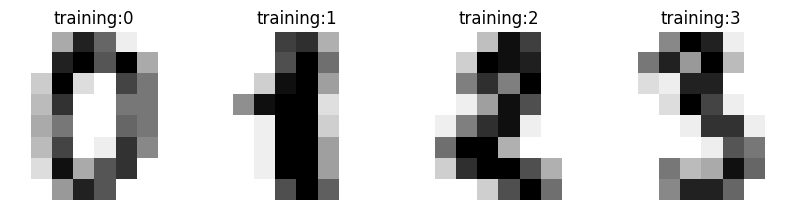

In [11]:
from sklearn.datasets import load_digits
df=load_digits()
_, axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title("training:%i"%label)

**Data Processing**

In [15]:
df.images.shape

(1797, 8, 8)

In [16]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [17]:
df.images[0].shape

(8, 8)

In [18]:
len(df.images)

1797

In [20]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [21]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [22]:
data[0].shape

(64,)

In [23]:
 data.shape

(1797, 64)

**Scaling image data**

In [24]:
data.max()

16.0

In [26]:
data=data/16
data.min()

0.0

In [27]:
data.max()

0.0625

In [29]:
data[0]

array([0.        , 0.        , 0.01953125, 0.05078125, 0.03515625,
       0.00390625, 0.        , 0.        , 0.        , 0.        ,
       0.05078125, 0.05859375, 0.0390625 , 0.05859375, 0.01953125,
       0.        , 0.        , 0.01171875, 0.05859375, 0.0078125 ,
       0.        , 0.04296875, 0.03125   , 0.        , 0.        ,
       0.015625  , 0.046875  , 0.        , 0.        , 0.03125   ,
       0.03125   , 0.        , 0.        , 0.01953125, 0.03125   ,
       0.        , 0.        , 0.03515625, 0.03125   , 0.        ,
       0.        , 0.015625  , 0.04296875, 0.        , 0.00390625,
       0.046875  , 0.02734375, 0.        , 0.        , 0.0078125 ,
       0.0546875 , 0.01953125, 0.0390625 , 0.046875  , 0.        ,
       0.        , 0.        , 0.        , 0.0234375 , 0.05078125,
       0.0390625 , 0.        , 0.        , 0.        ])

**Train Test Spilt Data**

In [33]:
from sklearn.model_selection import train_test_split

In [40]:
x_train ,x_test,y_train,y_test =train_test_split(data, df.target, test_size=0.3)

In [41]:
 x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

**Random Forest Model**

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf=RandomForestClassifier()

In [47]:
rf.fit(x_train,y_train)

RandomForestClassifier()

**Predict Test Data**

In [48]:
y_pred=rf.predict(x_test)

In [49]:
y_pred

array([9, 0, 7, 9, 9, 5, 3, 8, 6, 7, 6, 0, 1, 9, 4, 9, 5, 7, 3, 3, 5, 0,
       0, 2, 5, 7, 3, 7, 0, 0, 7, 4, 4, 7, 9, 1, 3, 4, 3, 3, 8, 2, 5, 9,
       0, 4, 0, 5, 1, 8, 1, 7, 2, 1, 2, 7, 1, 8, 4, 4, 2, 8, 4, 5, 4, 2,
       1, 0, 1, 6, 5, 5, 3, 3, 3, 1, 1, 3, 2, 2, 7, 5, 5, 7, 7, 3, 1, 0,
       6, 0, 4, 9, 4, 7, 8, 1, 2, 9, 1, 0, 6, 7, 1, 3, 6, 8, 5, 8, 8, 6,
       1, 9, 4, 3, 3, 2, 9, 9, 9, 6, 5, 8, 9, 1, 9, 2, 2, 3, 8, 9, 1, 2,
       1, 7, 0, 0, 6, 9, 0, 7, 2, 5, 8, 8, 7, 4, 0, 6, 2, 8, 7, 6, 3, 1,
       8, 6, 7, 5, 3, 0, 8, 2, 4, 1, 9, 8, 2, 0, 5, 0, 9, 2, 1, 7, 5, 1,
       6, 3, 6, 6, 5, 0, 2, 9, 6, 4, 9, 9, 5, 8, 5, 0, 4, 3, 1, 7, 7, 5,
       2, 3, 1, 8, 1, 9, 3, 1, 6, 8, 9, 0, 1, 1, 5, 5, 2, 0, 0, 6, 4, 1,
       5, 8, 4, 3, 1, 9, 2, 7, 9, 1, 7, 3, 2, 1, 9, 6, 4, 1, 8, 1, 1, 1,
       6, 7, 8, 2, 8, 5, 0, 5, 7, 2, 5, 7, 6, 3, 9, 9, 9, 7, 2, 3, 2, 1,
       9, 6, 6, 4, 2, 5, 1, 3, 8, 2, 9, 4, 9, 4, 7, 1, 4, 6, 0, 6, 3, 8,
       9, 6, 2, 8, 0, 4, 2, 4, 4, 9, 1, 3, 9, 6, 1,

**Model Accuracy**

In [50]:
from sklearn.metrics import confusion_matrix,classification_report

In [51]:
confusion_matrix(y_test,y_pred)

array([[54,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 66,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 49,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 50,  0,  2,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 56,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 50,  1,  0,  0,  3],
       [ 1,  0,  0,  0,  0,  0, 47,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 55,  0,  3],
       [ 0,  2,  0,  0,  0,  0,  0,  1, 46,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 47]])

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.97      0.99      0.98        67
           2       1.00      1.00      1.00        49
           3       1.00      0.94      0.97        53
           4       0.95      1.00      0.97        56
           5       0.93      0.91      0.92        55
           6       0.98      0.98      0.98        48
           7       0.98      0.93      0.96        59
           8       0.96      0.94      0.95        49
           9       0.89      0.96      0.92        49

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540

